eps:  [15.3+3.7j]
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.640764727659119
ks: 0.35210196368788255, kl: 2.64076472765

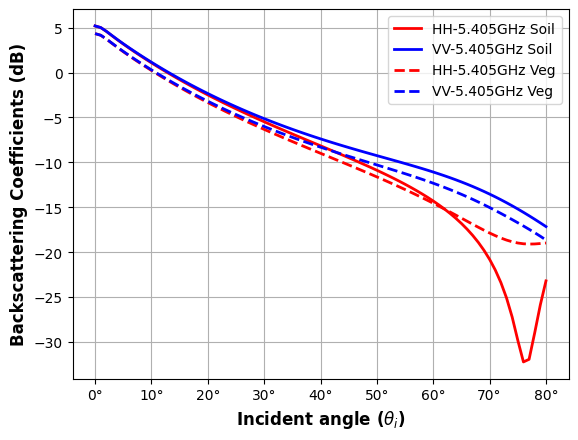

In [10]:
import numpy as np
from collections import defaultdict
from ssrt import S2RTR
from aiem import AIEM
import matplotlib.pyplot as plt


# Set the bacscattering models
RT_models = {
    'RT_s': 'AIEM', # options: 'AIEM', 'PRISM1'
    'RT_c': 'Diff' # options: 'Diffuse', 'Specular'
    }

# Radar parameters
frqs = [1.5, 5.405]
thetas = np.arange(0.00001, 81, 1)
phi_i = 0.
phi_s = 179.999

# Vegetation parameters
eps2 = np.array([2+0.*1j,], dtype=complex)
a = 0.1
kappa_e = 1.
d = 0.1

# Soil parameters
err = 15.3
eri = 3.7
eps3 = np.array([err+eri*1j,], dtype=complex)
print('eps: ', eps3)
s = 0.0112
cl = 0.084
acftype = 'exp' # options: 'exp', 'gauss', 'pow'

# Initialize defaultdicts to store the results
HH_s = defaultdict(list)
VV_s = defaultdict(list)
HV_s = defaultdict(list)
VH_s = defaultdict(list)

HH_c = defaultdict(list)
VV_c = defaultdict(list)
HV_c = defaultdict(list)
VH_c = defaultdict(list)


pol_list = ['vv', 'hh', 'hv', 'vh']

# Loop over the angles
for f in frqs:
    for theta_i in thetas:
        theta_s = theta_i

        # Create an instance of the S2RTR class
        rt = S2RTR(
            frq_GHz=f, theta_i=theta_i, theta_s=theta_s, phi_i=phi_i, phi_s=phi_s, 
            s=s, cl=cl, eps2=eps2, eps3=eps3, a=a, kappa_e=kappa_e, d=d, acftype=acftype, RT_models=RT_models)
        # Calculate backscattering coefficients
        sig_a, sig_s, sig_c = rt.calc_sigma(todB=True)

        # Store the results in the defaultdicts
        HH_s[f].append(sig_s['hh'])
        VV_s[f].append(sig_s['vv'])
        HV_s[f].append(sig_s['hv'])
        VH_s[f].append(sig_s['vh'])

        HH_c[f].append(sig_c['hh'])
        VV_c[f].append(sig_c['vv'])
        HV_c[f].append(sig_c['hv'])
        VH_c[f].append(sig_c['vh'])

        # intg = AIEM(frq_ghz=f, theta_i=theta_i, theta_s=theta_s, phi_i=phi_i, phi_s=phi_s, s=s, l=cl, eps=eps3, acf_type=acftype)
        # sig0 = intg.run()

        # VV_s[f].append(sig0[..., 0][0])
        # HH_s[f].append(sig0[..., 1][0])
        # HV_s[f].append(sig0[..., 2][0])
        # VH_s[f].append(sig0[..., 3][0])

        


# Plotting results
plt.figure(2)
# Plotting HH and VV for each itype
# plt.plot(thetas, HH_s[frqs[0]], color='r', linewidth=2, label='HH-1.5GHz Soil')
# plt.plot(thetas, VV_s[frqs[0]], color='b', linewidth=2, label='VV-1.5GHz Soil')
# plt.plot(thetas, HV_s[frqs[0]], color='g', linewidth=2, label='HV-1.5GHz Soil')
# plt.plot(thetas, VH_s[frqs[0]], color='c', linewidth=2, label='VH-1.5GHz Soil')

# plt.plot(thetas, HH_c[frqs[0]], color='r', linewidth=2, label='HH-1.5GHz Veg', linestyle='--')
# plt.plot(thetas, VV_c[frqs[0]], color='b', linewidth=2, label='VV-1.5GHz Veg', linestyle='--')


plt.plot(thetas, HH_s[frqs[1]], color='r', linewidth=2, label='HH-5.405GHz Soil')
plt.plot(thetas, VV_s[frqs[1]], color='b', linewidth=2, label='VV-5.405GHz Soil')
plt.plot(thetas, HH_c[frqs[1]], color='r', linewidth=2, label='HH-5.405GHz Veg', linestyle='--')
plt.plot(thetas, VV_c[frqs[1]], color='b', linewidth=2, label='VV-5.405GHz Veg', linestyle='--')


# Customizing plot appearance
plt.grid(True)
plt.xticks(ticks=np.arange(0, 81, 10), labels=['0°', '10°', '20°', '30°', '40°', '50°', '60°', '70°', '80°'], fontsize=10)
plt.xlabel(r'Incident angle ($\theta_i$)', fontsize=12, fontweight='bold')
plt.ylabel('Backscattering Coefficients (dB)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.show()

In [2]:
def wavelength(f):
    """
    Calculates the wavelength of the electromagnetic wave.

    Parameters
    ----------
    f : float
        Frequency of the wave in Gigahertz (GHz).

    Returns
    -------
    float
        Wavelength in meters [m].
    """
    c0 = 299792458.  # speed of light [m/s]
    return c0 / (f * 1.0e9)

In [3]:
frq = 1.5  # frequency [GHz]
print('frq(GHz): ', frq)

lam = wavelength(frq)  # wavelength [m]
print('lambda(m): ', lam)

k = 2 * np.pi / lam  # angular wavenumber [rad/m]
print('k(rad/m): ', k)

sigma = 0.0112  # standard deviation of the surface height [m]
print('sigma(m): ', sigma)

cl = 0.084  # correlation length [m]
print('cl(m): ', cl)

ks = k * sigma
print('ks(-): ', ks)

# Calculate the correlation length in terms of the wavenumber
kl = k * cl
print('kl(-): ', kl)

frq(GHz):  1.5
lambda(m):  0.19986163866666667
k(rad/m):  31.437675329275226
sigma(m):  0.0112
cl(m):  0.084
ks(-):  0.35210196368788255
kl(-):  2.640764727659119


/home/debian/usask_work/SSRT/src/ssrt/surface/i2em.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  St0 = 1 / np.abs(1 + 8 * Rv0 / (cs * Ft)) ** 2
/home/debian/usask_work/SSRT/src/ssrt/surface/i2em.py:207: RuntimeWarning: invalid value encountered in scalar divide
  Tf = 1 - St / St0
/home/debian/usask_work/SSRT/.venv/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:606: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/home/debian/usask_work/SSRT/src/ssrt/surface/i2em.py:264: ComplexWarning: Casting complex values to real discards the imaginary part
  Ivv[idx] = (kz + ksz) ** n * fvv * np.exp(-sig_cm**2 * kz * ksz) + term_vv
/home/debian/usask_work/SSRT/src/ssrt/surface/i2em.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  Ihh[idx] = (kz + ksz) ** n * fhh * np.exp(-sig_cm**2 * kz * ksz) + term_hh
/home/debian/usask_work

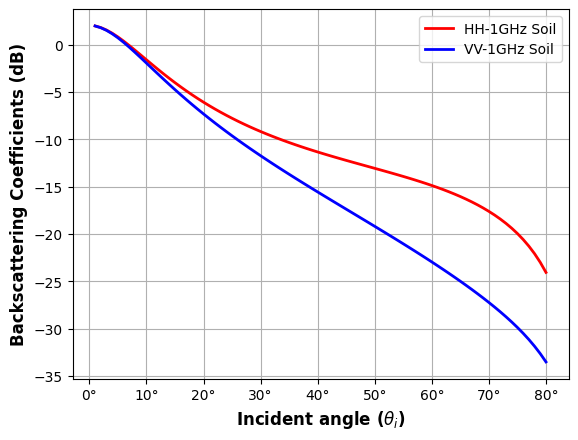

In [4]:
import numpy as np
from collections import defaultdict
from ssrt.surface import I2EM_Bistat_model
import matplotlib.pyplot as plt


# Example parameters
frqs = [1.5, ]           # GHz
rms_height = 0.0112         # meters (2 mm)
correlation_length = 0.084  # meters (2 cm)
incidence_angle = np.arange(0, 81, 1)    # degrees

azimuth_angle = 180      # degrees (backscatter)
dielectric_constant = 15.3 - 1j * 3.7  # complex dielectric constant (wet soil)
correlation_type = 1       # Exponential correlation function
xx_param = 2.0             # Parameter for correlation (only used if sp=3 or 4)


# Call the I2EM_Bistat_model function

VV, HH, HV, VH = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

for f in frqs:
    for theta_i in incidence_angle:

        theta_s = theta_i

        # Call the model
        sigma_0_vv, sigma_0_hh, sigma_0_hv, sigma_0_vh = I2EM_Bistat_model(
            fr=f,
            sig=rms_height,
            L=correlation_length,
            thi=theta_i,
            ths=theta_s,
            phs=azimuth_angle,
            er=dielectric_constant,
            sp=correlation_type,
            xx=xx_param
        )

        VV[f].append(sigma_0_vv)
        HH[f].append(sigma_0_hh)
        HV[f].append(sigma_0_hv)
        VH[f].append(sigma_0_vh)

# Plotting results
plt.figure(2)
# Plotting HH and VV for each itype
plt.plot(incidence_angle, VV[frqs[0]], color='r', linewidth=2, label='HH-1GHz Soil')
plt.plot(incidence_angle, HH[frqs[0]], color='b', linewidth=2, label='VV-1GHz Soil')


# Customizing plot appearance
plt.grid(True)
plt.xticks(ticks=np.arange(0, 81, 10), labels=['0°', '10°', '20°', '30°', '40°', '50°', '60°', '70°', '80°'], fontsize=10)
plt.xlabel(r'Incident angle ($\theta_i$)', fontsize=12, fontweight='bold')
plt.ylabel('Backscattering Coefficients (dB)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.show()
